
# Employee Attrition Analysis and Prediction

## Objective
The primary objective is to understand the factors influencing employee turnover at Acme Corporation and to develop a predictive model that can identify employees who are likely to leave the company in the near future.

## Business Context
Acme Corporation, a leading tech company, is experiencing a high rate of employee attrition. This turnover is detrimental to the company as it disrupts team dynamics, hampers project continuity, and lowers overall company morale. High attrition rates also lead to increased recruitment and training costs, which can significantly impact the company's financial performance. By leveraging data analytics and machine learning, Acme Corporation aims to gain insights into the reasons behind employee turnover and take proactive measures to retain valuable employees.

## Specific Goals
1. **Identify Key Factors:** Determine the key factors that contribute to employee attrition.
2. **Predict Attrition:** Develop a predictive model to identify employees who are at risk of leaving the company.
3. **Actionable Insights:** Provide actionable insights and recommendations to the HR department to help reduce attrition rates.
4. **Improve Retention Strategies:** Enhance current retention strategies based on data-driven insights.
5. **Understand Demographics:** Analyze demographic factors such as age, gender, and marital status to see if they play a role in attrition.
6. **Evaluate Job Satisfaction:** Assess the impact of job satisfaction, work-life balance, and other job-related factors on employee turnover.
7. **Financial Impact:** Understand the financial implications of attrition, including the cost of hiring and training new employees.


In [2]:
import pandas as pd

# Load the dataset
file_path = 'Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


---

## Data Structure and Content

### Overview

The dataset contains information about employees, including various attributes that may influence their likelihood of attrition. The dataset is structured with rows representing individual employees and columns representing different attributes.

### Data Structure

- **Rows:** Each row represents a unique employee.
- **Columns:** Each column represents a specific attribute related to the employee.

### Numerical Variables

The dataset includes several numerical variables that provide quantitative information about the employees:

1. **Age:** The age of the employee.
2. **DailyRate:** The daily rate of the employee.
3. **DistanceFromHome:** The distance from the employee's home to the workplace.
4. **HourlyRate:** The hourly rate of the employee.
5. **MonthlyIncome:** The monthly income of the employee.
6. **MonthlyRate:** The monthly rate of the employee.
7. **NumCompaniesWorked:** The number of companies the employee has worked for.
8. **PercentSalaryHike:** The percentage increase in salary.
9. **TotalWorkingYears:** The total number of years the employee has worked.
10. **TrainingTimesLastYear:** The number of training sessions attended last year.
11. **YearsAtCompany:** The number of years the employee has been with the company.
12. **YearsInCurrentRole:** The number of years the employee has been in the current role.
13. **YearsSinceLastPromotion:** The number of years since the employee's last promotion.
14. **YearsWithCurrManager:** The number of years the employee has worked with the current manager.

### Categorical Variables

The dataset also includes several categorical variables that provide qualitative information about the employees:

1. **Attrition:** Whether the employee has left the company (Yes/No).
2. **BusinessTravel:** The frequency of business travel (Travel_Rarely, Travel_Frequently, Non-Travel).
3. **Department:** The department in which the employee works (Sales, Research & Development, Human Resources).
4. **EducationField:** The field of education of the employee (Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other).
5. **Gender:** The gender of the employee (Male, Female).
6. **JobRole:** The role of the employee within the company (Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources).
7. **MaritalStatus:** The marital status of the employee (Single, Married, Divorced).
8. **Over18:** Whether the employee is over 18 years old (Yes).
9. **OverTime:** Whether the employee works overtime (Yes/No).

### Additional Variables

The dataset also includes additional variables that provide further context about the employees:

1. **EmployeeCount:** The number of employees (always 1 for each row).
2. **EmployeeNumber:** A unique identifier for each employee.
3. **EnvironmentSatisfaction:** The employee's satisfaction with the work environment (1-4).
4. **JobInvolvement:** The employee's involvement in their job (1-4).
5. **JobLevel:** The level of the employee's job (1-5).
6. **JobSatisfaction:** The employee's satisfaction with their job (1-4).
7. **PerformanceRating:** The employee's performance rating (1-4).
8. **RelationshipSatisfaction:** The employee's satisfaction with relationships at work (1-4).
9. **StandardHours:** The standard number of working hours (always 8).
10. **StockOptionLevel:** The level of stock options granted to the employee (0-3).
11. **WorkLifeBalance:** The employee's work-life balance (1-4).

This detailed structure and content of the dataset provide a comprehensive view of the various factors that may influence employee attrition, enabling a thorough analysis and understanding of the underlying patterns and trends.

In [52]:
# Data Overview
data_shape = df.shape
data_types = df.dtypes

# First Glance
first_rows = df.head()

# Summary Statistics for Numerical Variables
numerical_summary = df.describe()

# Summary Statistics for Categorical Variables
categorical_summary = df.describe(include=['object'])

data_shape, data_types, first_rows, numerical_summary, categorical_summary

((1470, 35),
 Age                          int64
 Attrition                   object
 BusinessTravel              object
 DailyRate                    int64
 Department                  object
 DistanceFromHome             int64
 Education                    int64
 EducationField              object
 EmployeeCount                int64
 EmployeeNumber               int64
 EnvironmentSatisfaction      int64
 Gender                      object
 HourlyRate                   int64
 JobInvolvement               int64
 JobLevel                     int64
 JobRole                     object
 JobSatisfaction              int64
 MaritalStatus               object
 MonthlyIncome                int64
 MonthlyRate                  int64
 NumCompaniesWorked           int64
 Over18                      object
 OverTime                    object
 PercentSalaryHike            int64
 PerformanceRating            int64
 RelationshipSatisfaction     int64
 StandardHours                int64
 StockOptionLev

# Summary of Findings

## Data Overview:

1. **Shape:** The dataset contains 1,470 rows and 35 columns.
2. **Data Types:** The dataset includes both numerical and categorical variables. 
   - Key numerical variables include Age, DailyRate, DistanceFromHome, and MonthlyIncome.
   - Key categorical variables include Attrition, BusinessTravel, Department, and Gender.

## First Glance:

3. The first few rows of the dataset show a mix of demographic, job-related, and satisfaction-related attributes.

## Summary Statistics:

4. **Numerical Variables:** The summary statistics for numerical variables provide insights into the central tendency and dispersion (e.g., mean, standard deviation, min, max).
5. **Categorical Variables:** The summary statistics for categorical variables show the count, unique values, top (most frequent) values, and their frequencies.

This initial exploration provides a good foundation for further data cleaning and analysis.

---

---

### Visualizing Data

#### Exploratory Data Analysis (EDA)

**Steps:**

- **Data Distribution:** Analyze the distribution of each variable using histograms for numerical variables and bar plots for categorical variables.
- **Outliers:** Identify and visualize outliers using box plots for numerical variables.

*Note: We used ggplot for visualization.*

<Figure size 2000x1500 with 0 Axes>

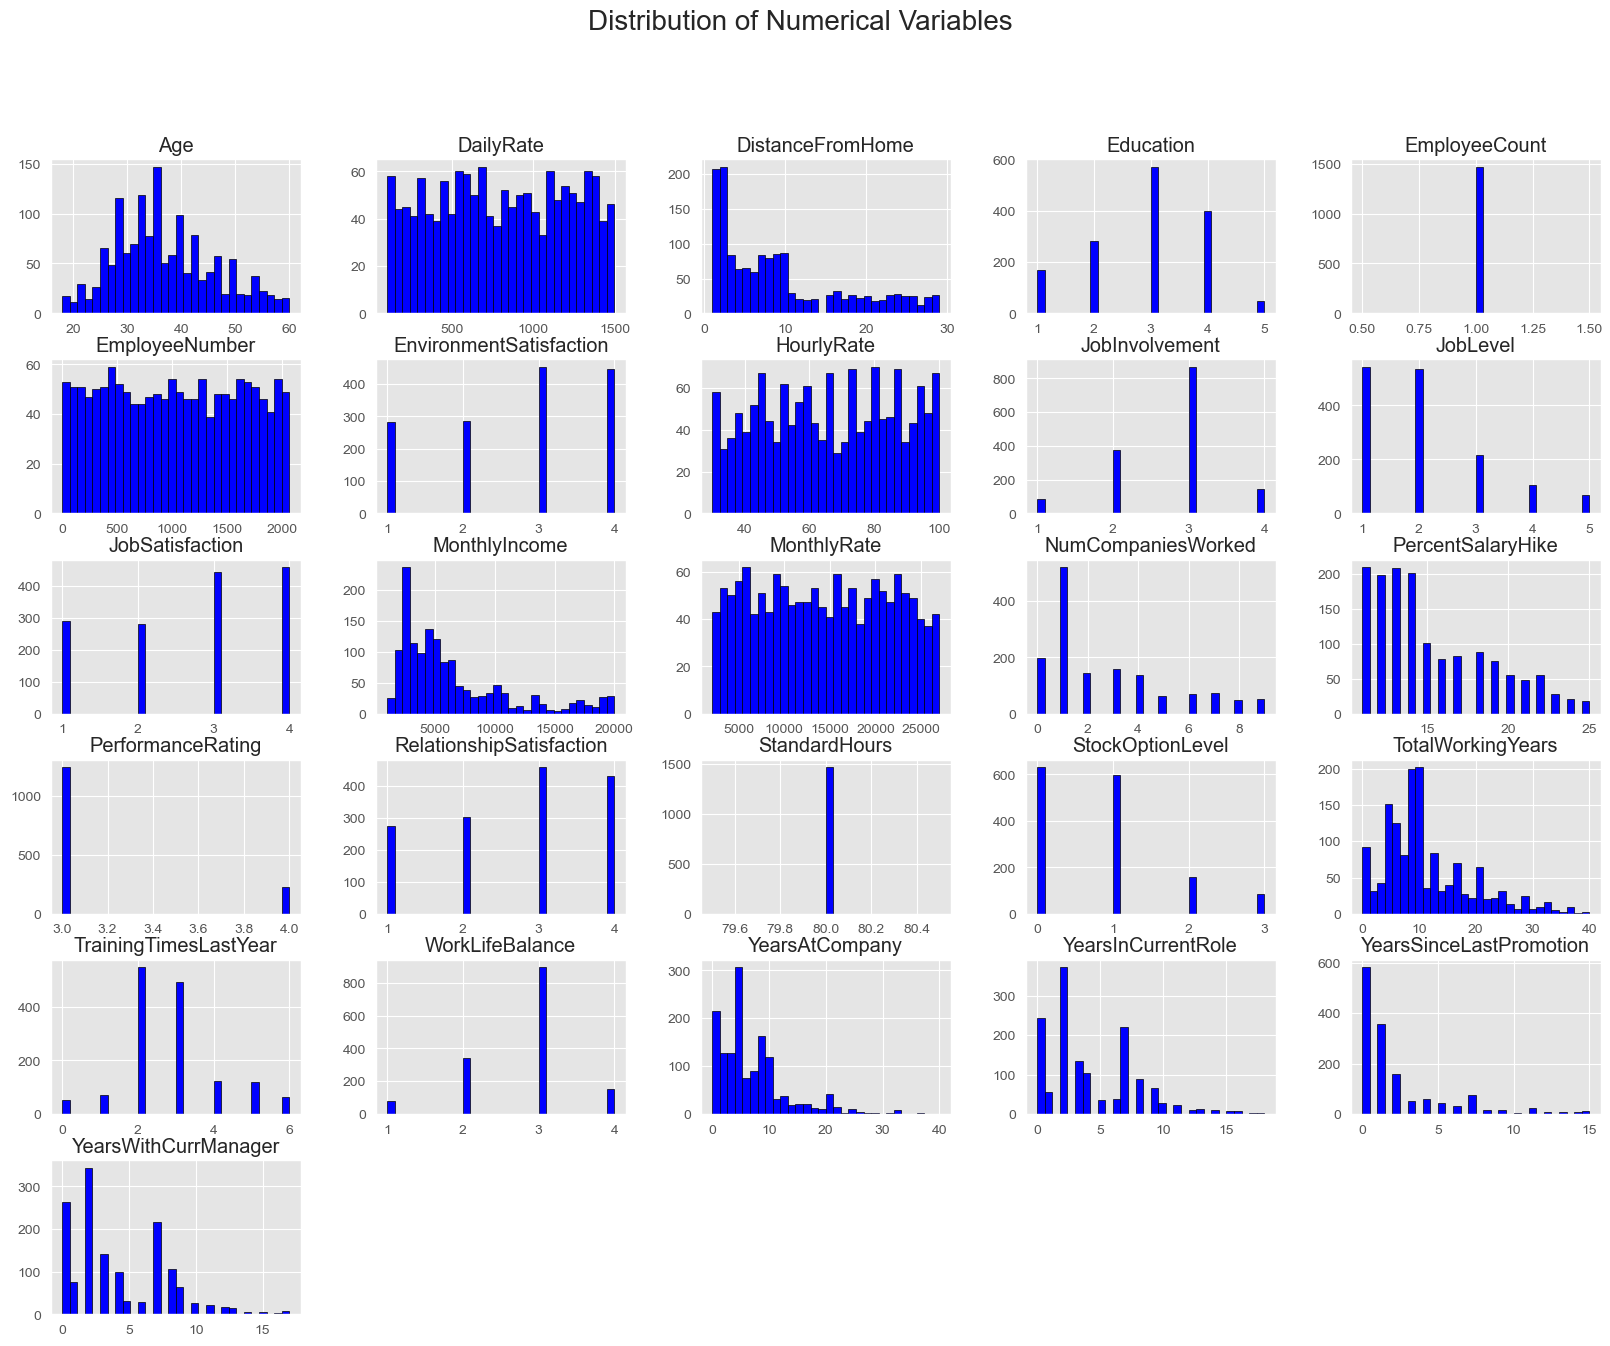

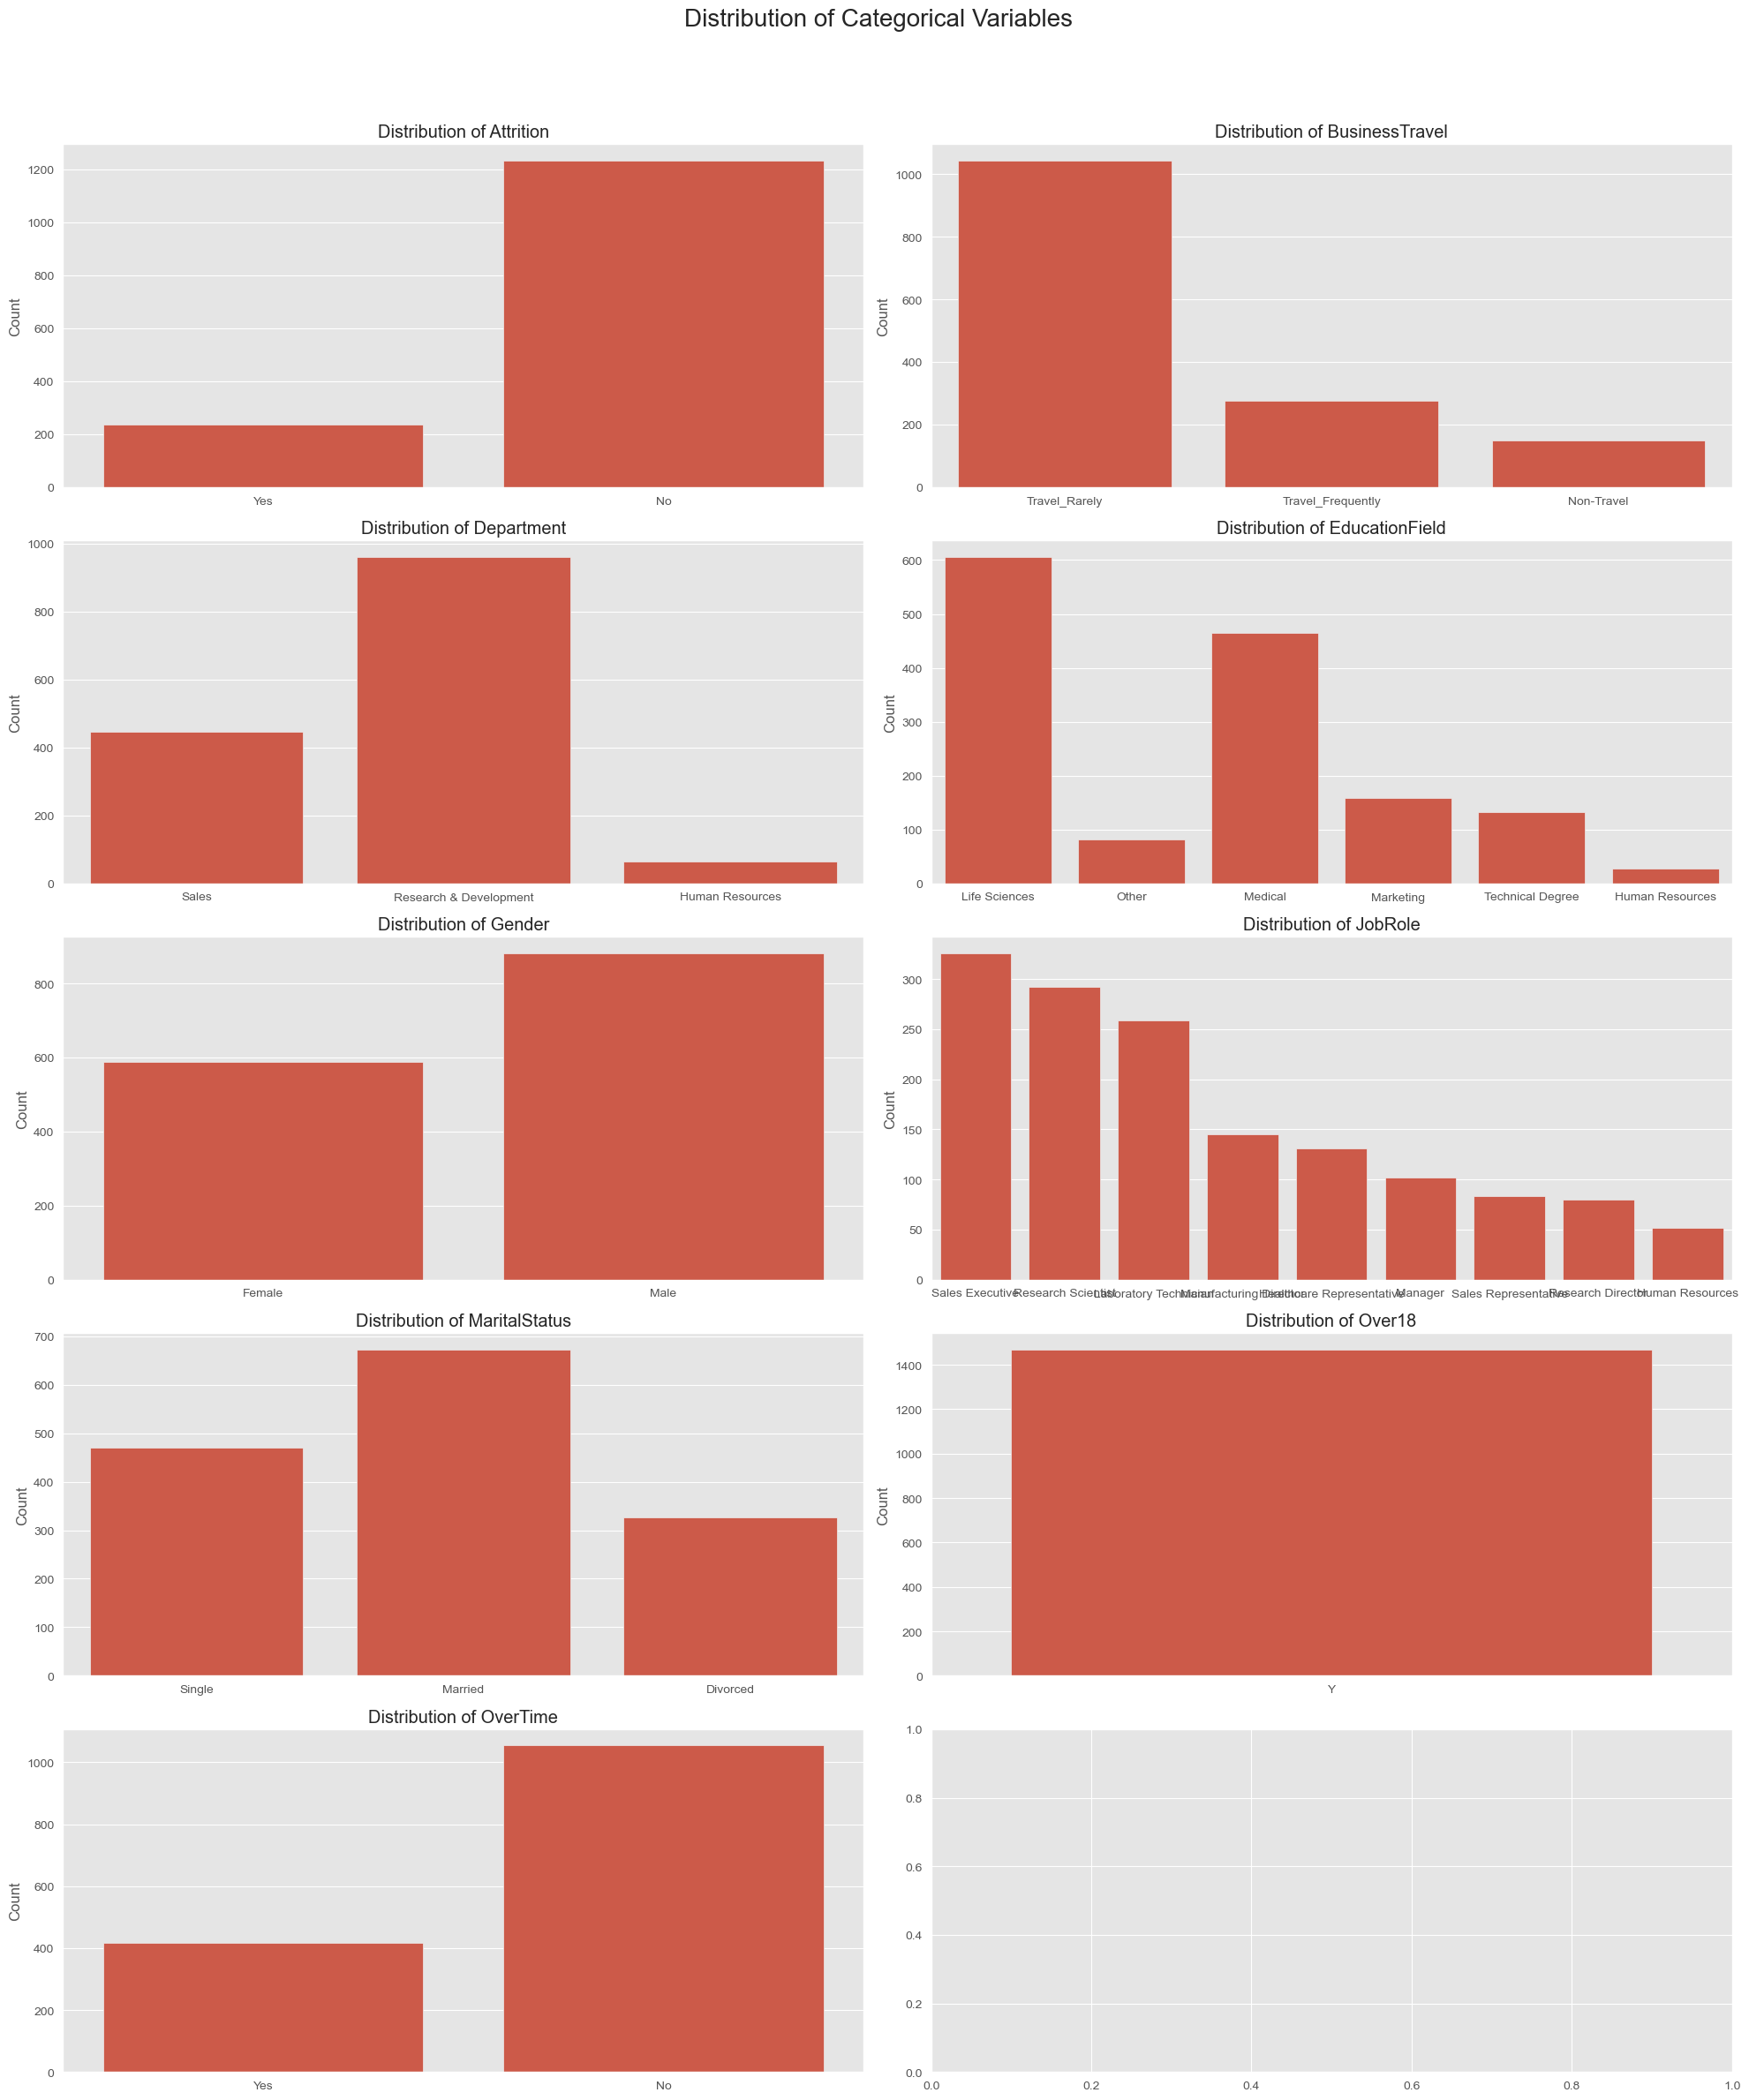

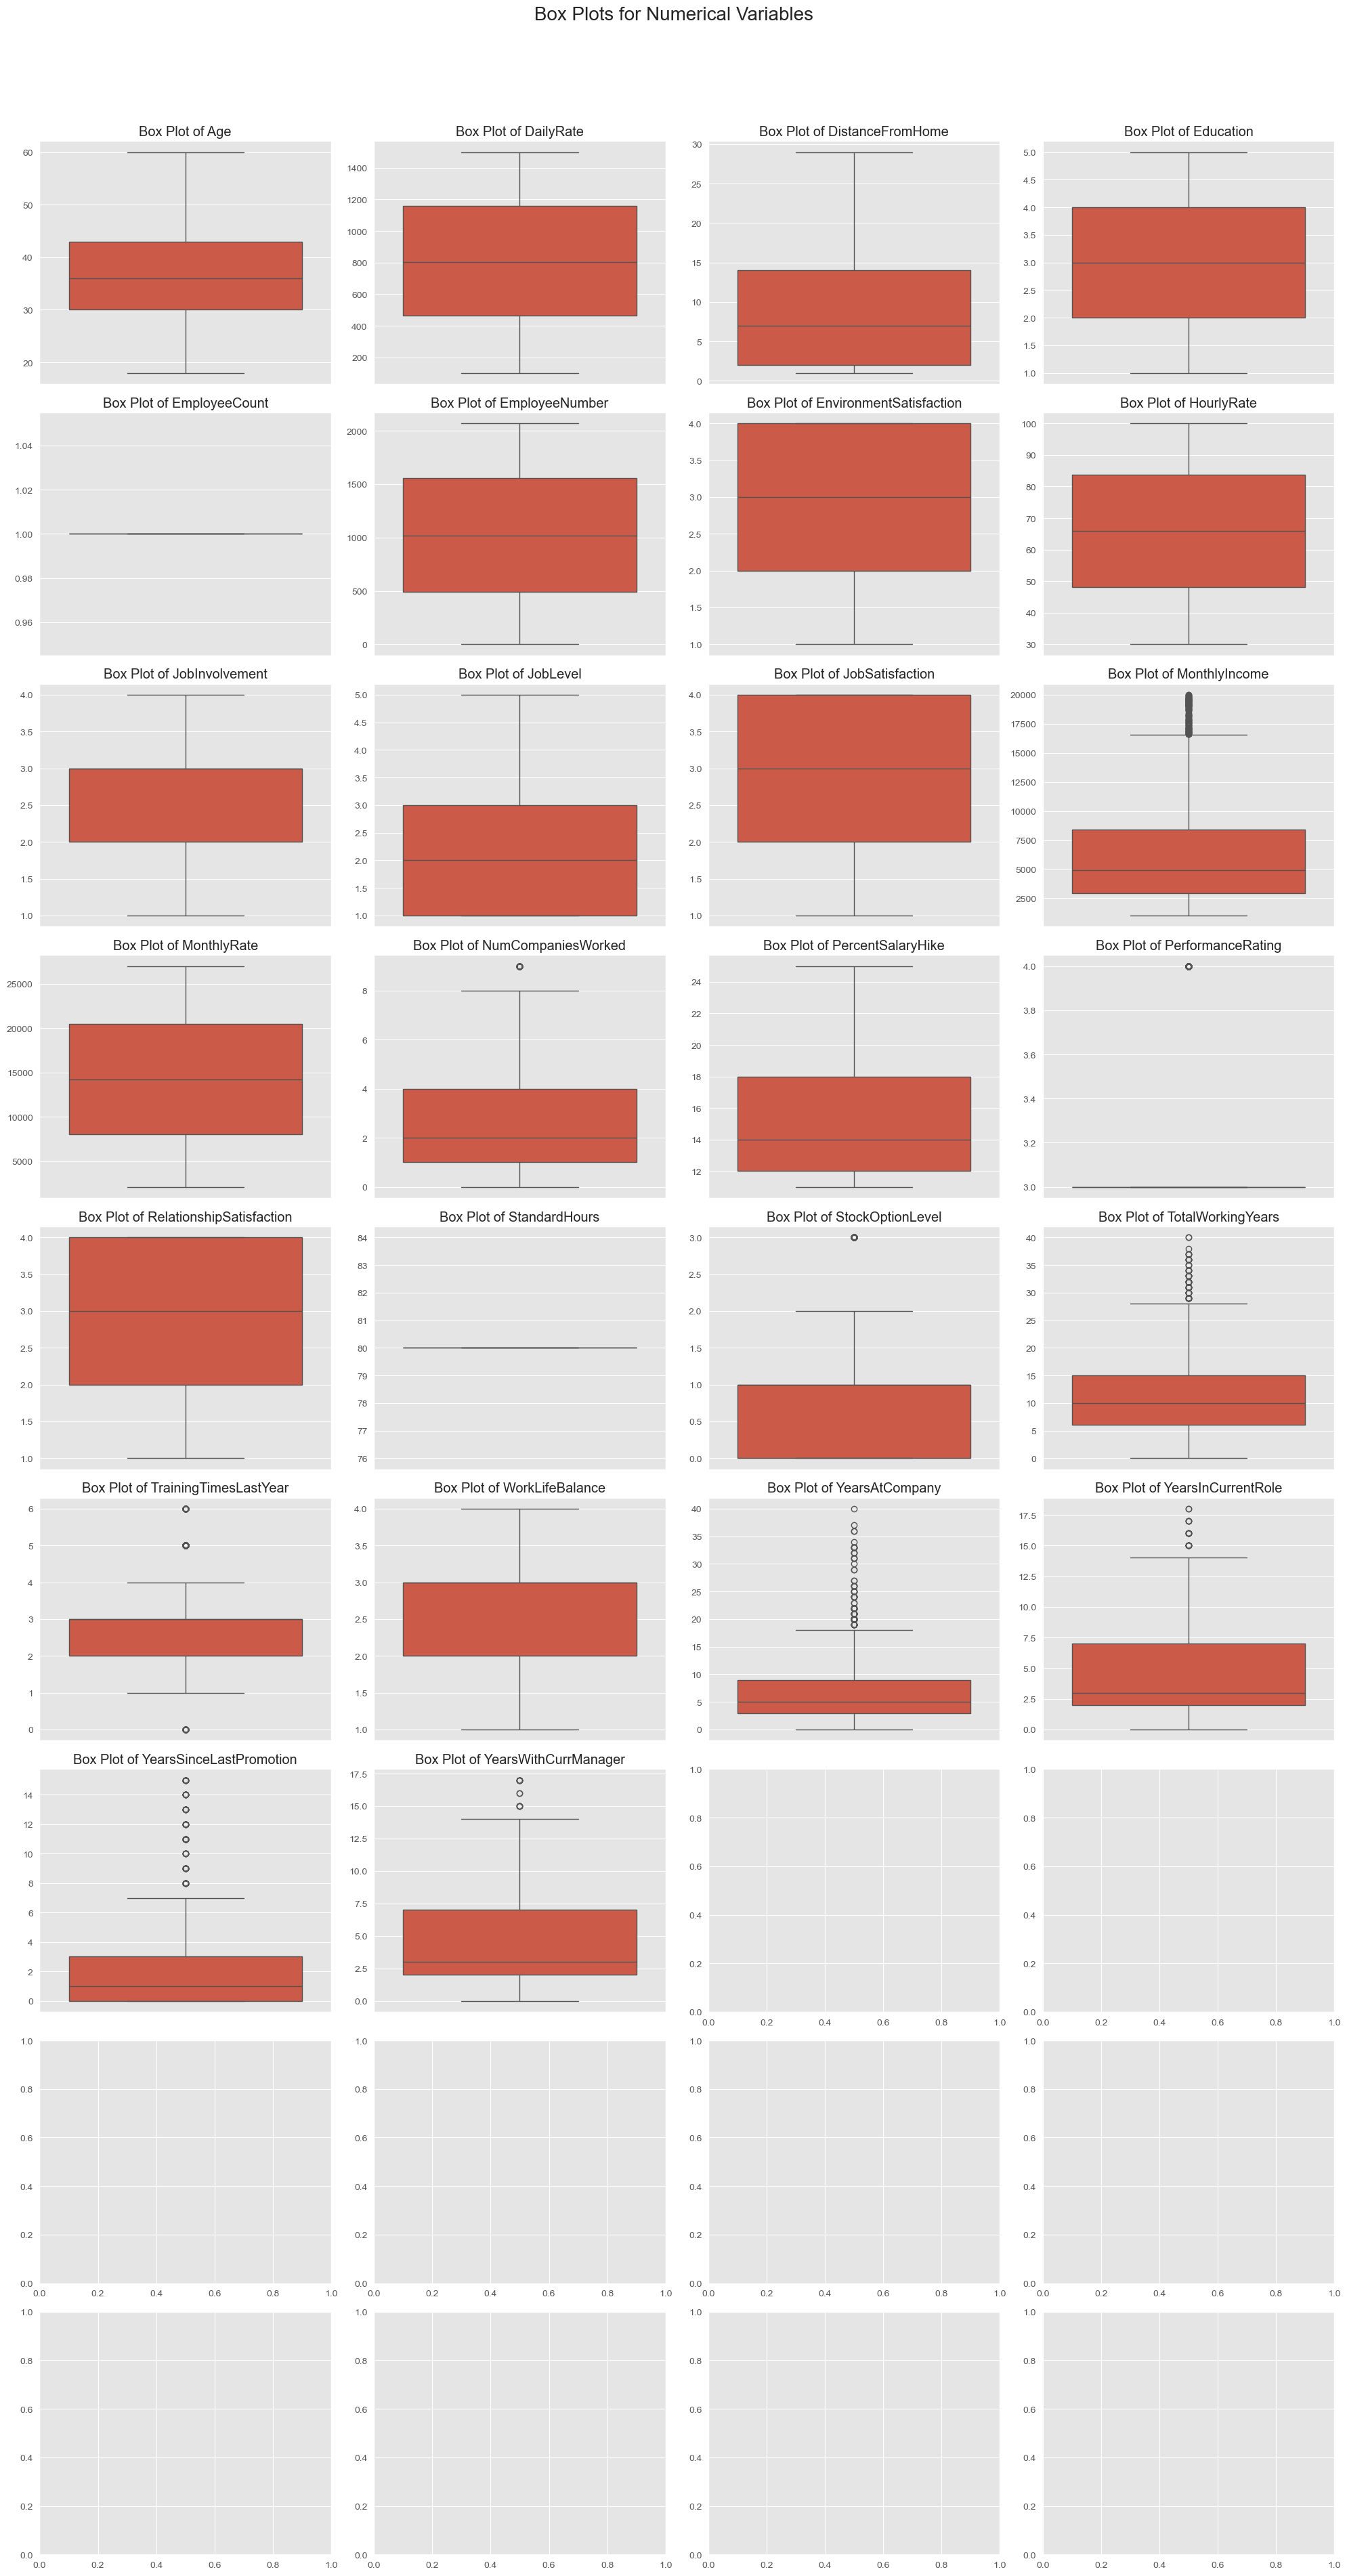

In [53]:
# Set up the plotting environment
plt.style.use('ggplot')
plt.figure(figsize=(20, 15))

# Data Distribution for Numerical Variables
df.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.show()

# Data Distribution for Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.suptitle('Distribution of Categorical Variables', fontsize=20)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Outliers Identification and Visualization
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 40))
fig.suptitle('Box Plots for Numerical Variables', fontsize=20)

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Box Plot of {col}')
    axes[i//4, i%4].set_xlabel('')
    axes[i//4, i%4].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Summary of Findings

### Data Distribution:

1. **Numerical Variables:** Most numerical variables exhibit a normal distribution, with some skewness observed in variables like MonthlyIncome and YearsAtCompany.
2. **Categorical Variables:** The categorical variables show varied distributions. For example, Attrition is heavily imbalanced with more 'No' responses, and BusinessTravel has a higher frequency of 'Travel_Rarely'.

### Outliers:

3. Outliers are present in several numerical variables, notably in MonthlyIncome, YearsAtCompany, and DailyRate. These outliers could potentially influence the results of any statistical analysis and may need to be addressed.

This initial EDA provides a comprehensive overview of the data distribution and highlights areas that may require further investigation or preprocessing.




---

---

## Univariate Analysis

### Numerical Variables

We'll analyze and visualize the distribution of numerical variables. Understanding the distribution of numerical variables such as Age, DailyRate, DistanceFromHome, and MonthlyIncome is crucial for several reasons:

1. **Age:** Analyzing the age distribution helps in understanding if certain age groups are more prone to attrition.
2. **DailyRate and MonthlyIncome:** These variables can indicate if compensation levels are influencing employee attrition.
3. **DistanceFromHome:** This can reveal if employees living farther from the workplace are more likely to leave.
4. **YearsAtCompany and YearsInCurrentRole:** These variables can show if longer tenure or time in the same role affects attrition rates.

### Categorical Variables

We'll analyze and visualize the distribution of categorical variables. Analyzing categorical variables such as Attrition, BusinessTravel, Department, and Gender is important because:

1. **Attrition:** This is the target variable, and understanding its distribution is fundamental to the analysis.
2. **BusinessTravel:** Frequent travel might be a factor contributing to employee attrition.
3. **Department:** Certain departments might have higher attrition rates, indicating potential issues within those areas.
4. **Gender:** Analyzing gender distribution can help identify if there are gender-specific trends in attrition.
5. **JobRole and JobSatisfaction:** These can provide insights into whether specific roles or job satisfaction levels are linked to higher attrition rates.
6. **MaritalStatus:** This can help understand if marital status influences the likelihood of an employee leaving the company.


<Figure size 2000x1500 with 0 Axes>

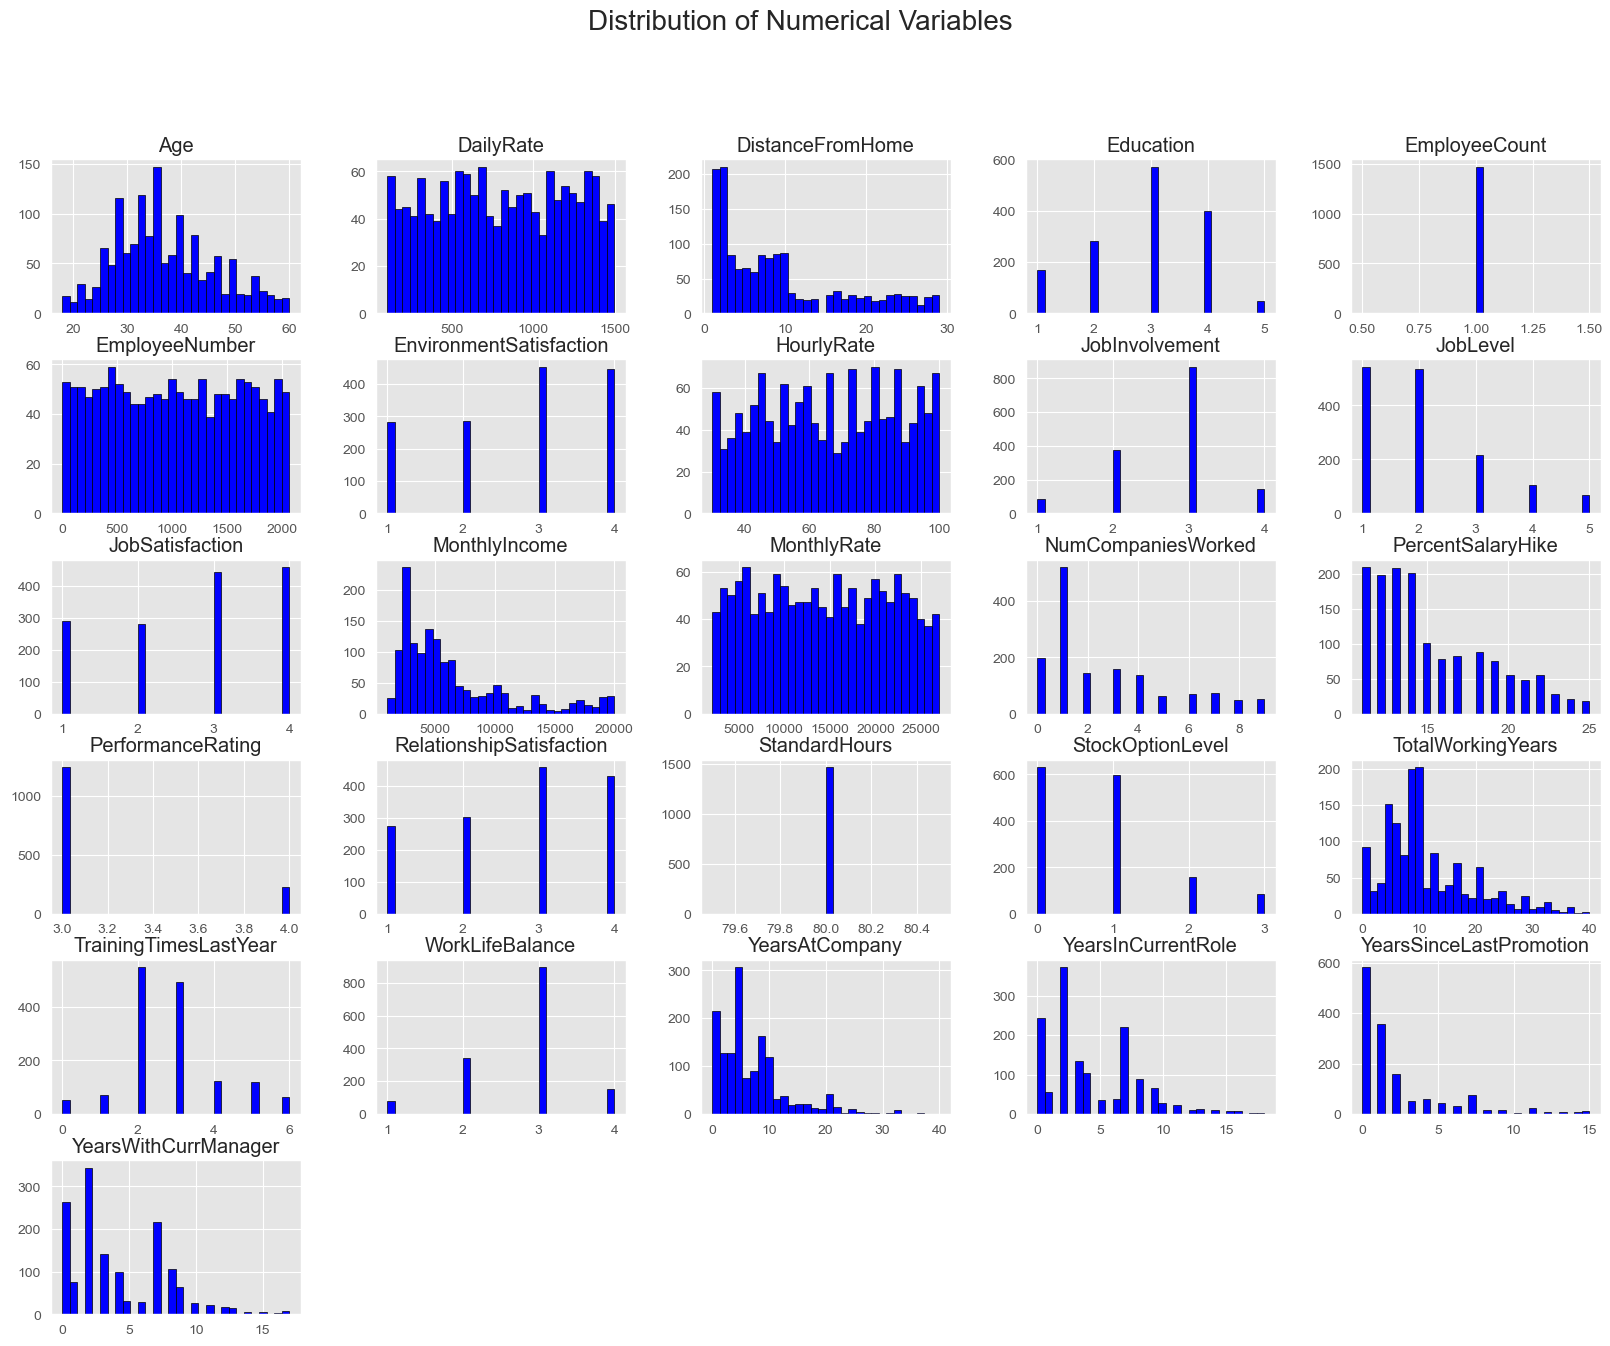

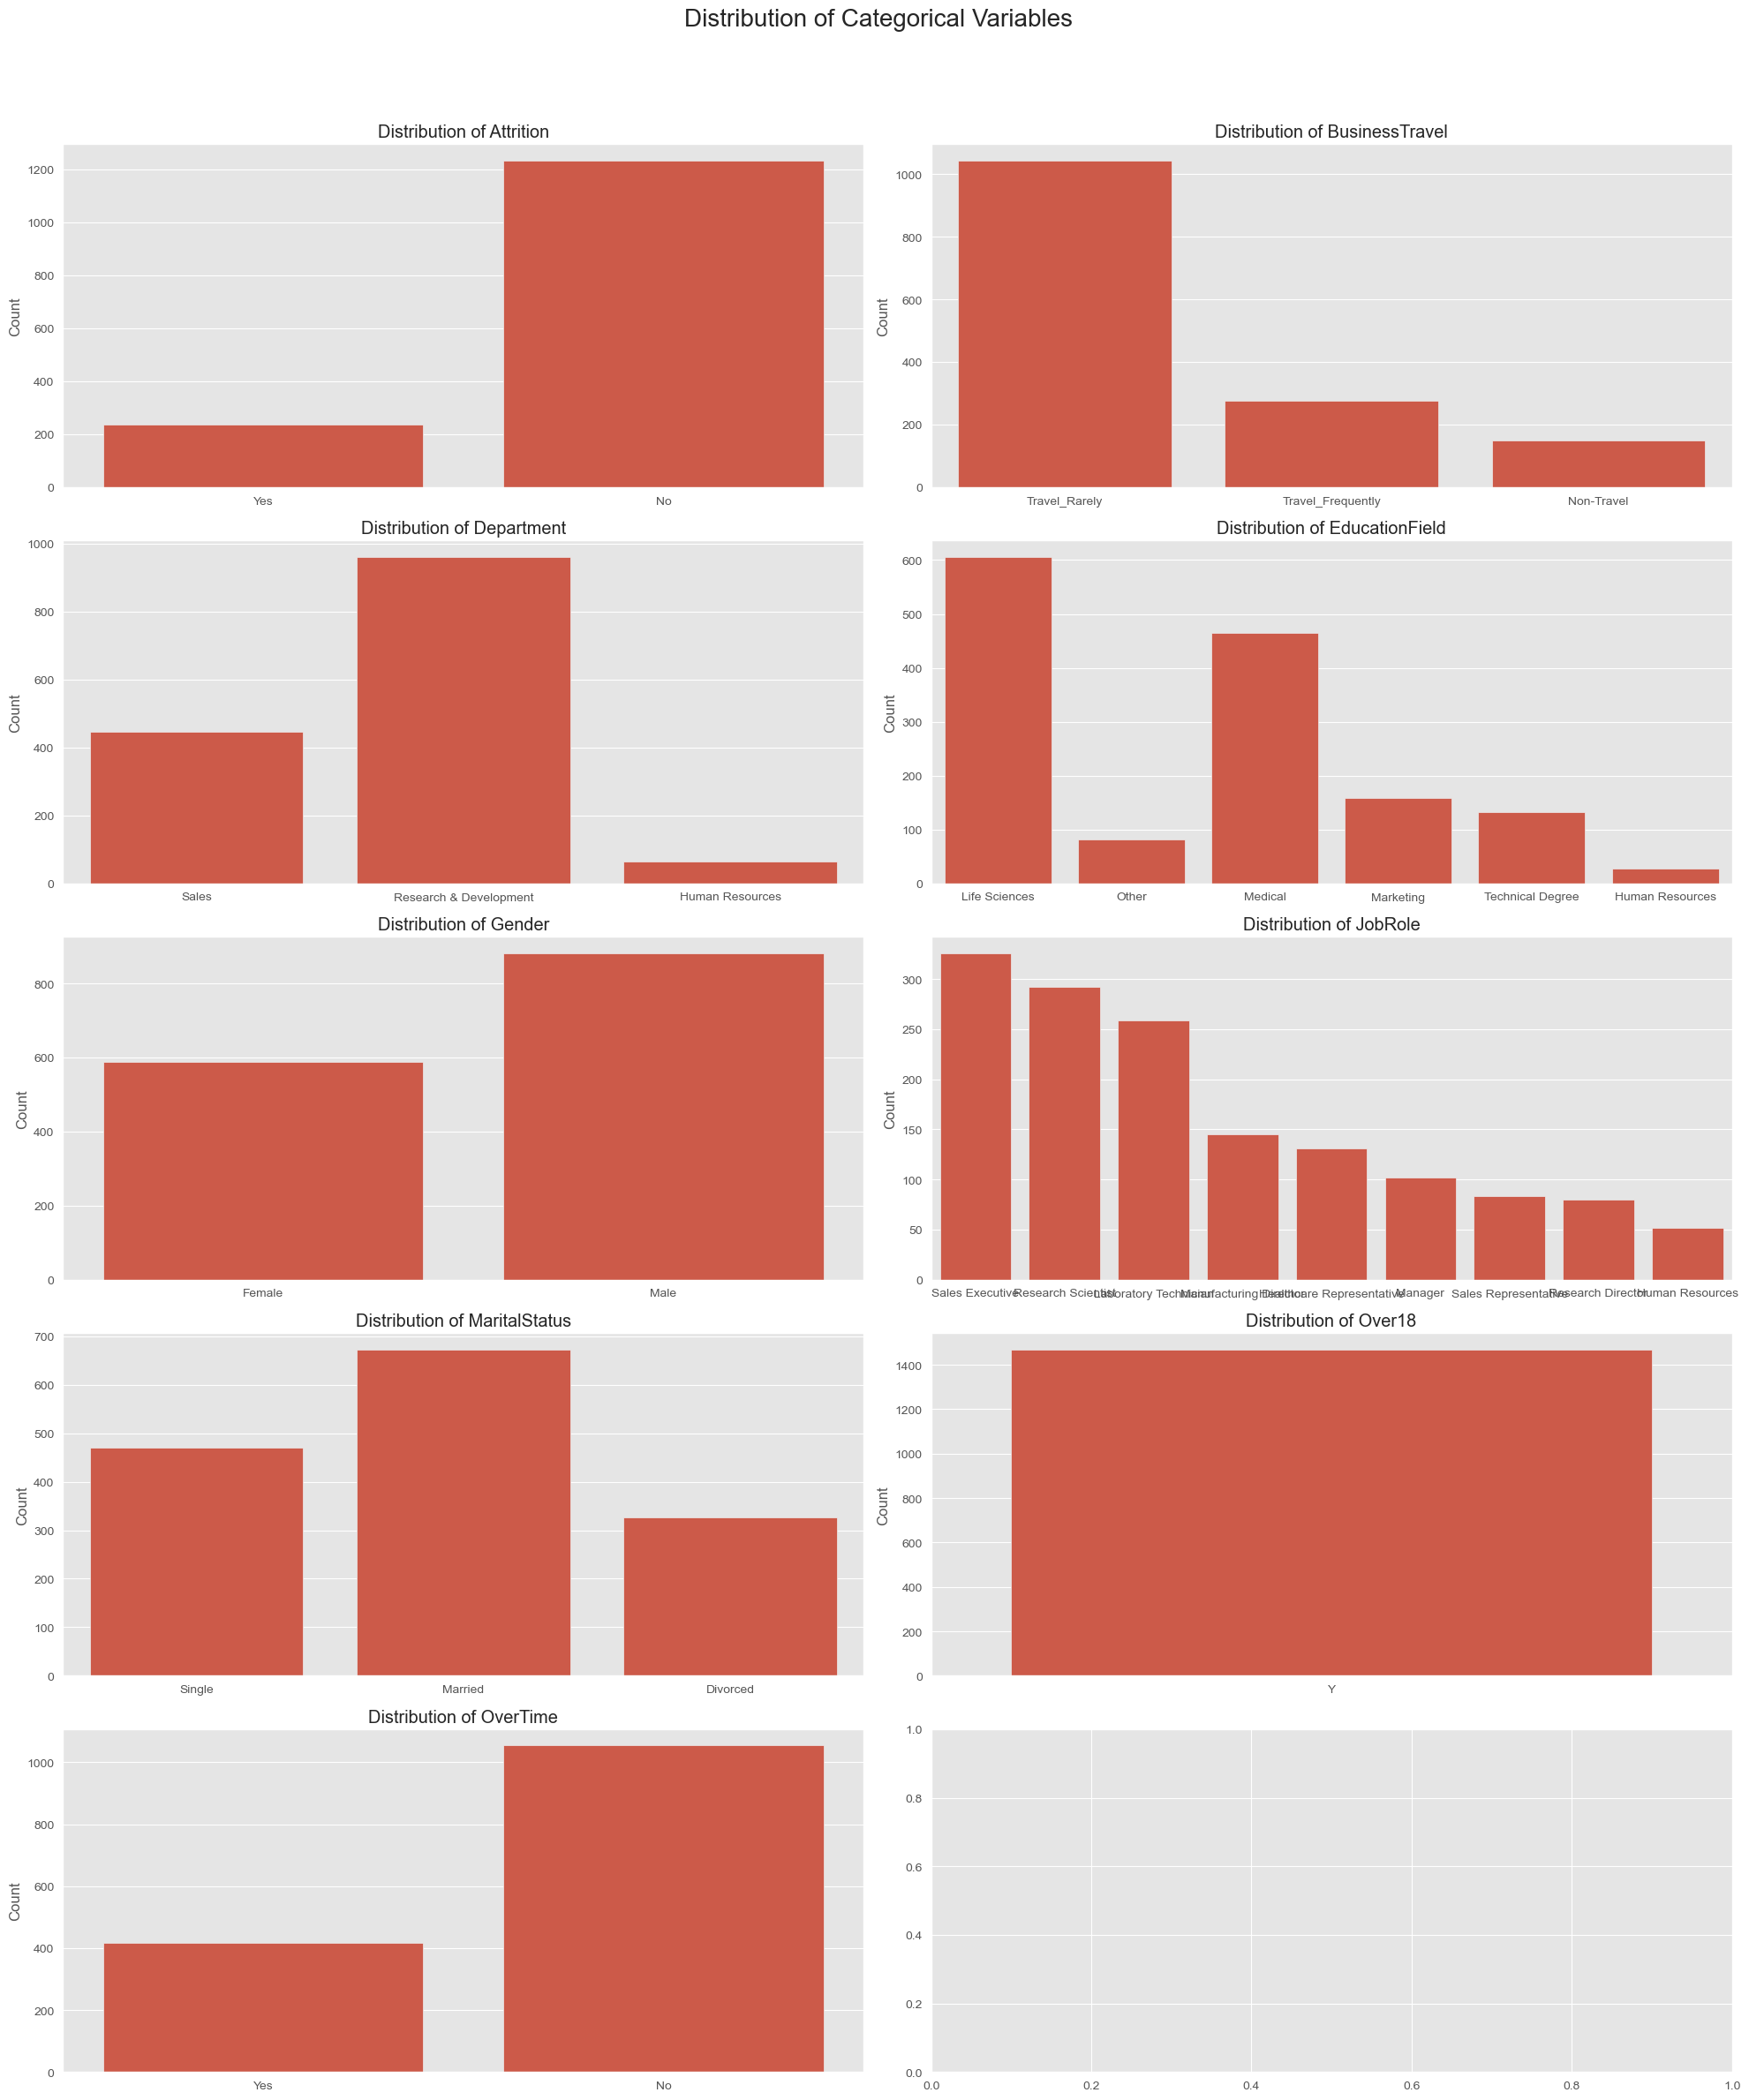

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
#df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Set up the plotting environment
plt.style.use('ggplot')

# Univariate Analysis for Numerical Variables
plt.figure(figsize=(20, 15))
df.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.show()

# Univariate Analysis for Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.suptitle('Distribution of Categorical Variables', fontsize=20)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Summary of Univariate Analysis

### Numerical Variables:

- The numerical variables generally exhibit a normal distribution, with some skewness observed in variables like MonthlyIncome and YearsAtCompany.
- Variables such as DailyRate, HourlyRate, and MonthlyRate show a more uniform distribution.

### Categorical Variables:

- The categorical variables display varied distributions. For instance, Attrition is heavily imbalanced with a higher frequency of 'No' responses.
- BusinessTravel shows that most employees travel rarely, while JobRole and Department have more balanced distributions across their categories.

This analysis provides a clear understanding of the distribution of both numerical and categorical variables, highlighting areas that may require further investigation or preprocessing.

---

---

## Bivariate Analysis

### Importance of Bivariate Analysis

Bivariate analysis involves examining the relationship between two variables. This type of analysis is crucial for understanding how different factors interact with each other and influence employee attrition. By analyzing pairs of variables, we can identify correlations, trends, and potential causal relationships that may not be evident from univariate analysis alone.

### Numerical Variables

We'll analyze the relationships between numerical variables and the target variable (Attrition). This can help us understand how factors such as Age, MonthlyIncome, and YearsAtCompany correlate with employee attrition.

1. **Age vs. Attrition:** Analyzing the relationship between age and attrition can reveal if certain age groups are more likely to leave the company.
2. **MonthlyIncome vs. Attrition:** This can show if income levels have a significant impact on employee retention.
3. **YearsAtCompany vs. Attrition:** Understanding this relationship can help determine if longer tenure at the company affects the likelihood of attrition.

### Categorical Variables

We'll analyze the relationships between categorical variables and the target variable (Attrition). This can help us understand how factors such as BusinessTravel, Department, and JobRole influence employee attrition.

1. **BusinessTravel vs. Attrition:** This can reveal if frequent travel is a factor contributing to higher attrition rates.
2. **Department vs. Attrition:** Analyzing this relationship can help identify if certain departments have higher attrition rates.
3. **JobRole vs. Attrition:** This can show if specific job roles are more prone to attrition.

### Mixed Variables

We'll also analyze the relationships between numerical and categorical variables to understand how they interact and influence employee attrition.

1. **MonthlyIncome vs. JobRole:** This can help identify if certain job roles are associated with higher or lower income levels, which may influence attrition.
2. **YearsAtCompany vs. Department:** Understanding this relationship can reveal if employees in certain departments tend to stay longer at the company.

This bivariate analysis will provide deeper insights into the factors influencing employee attrition and help identify areas that may require further investigation or targeted interventions.

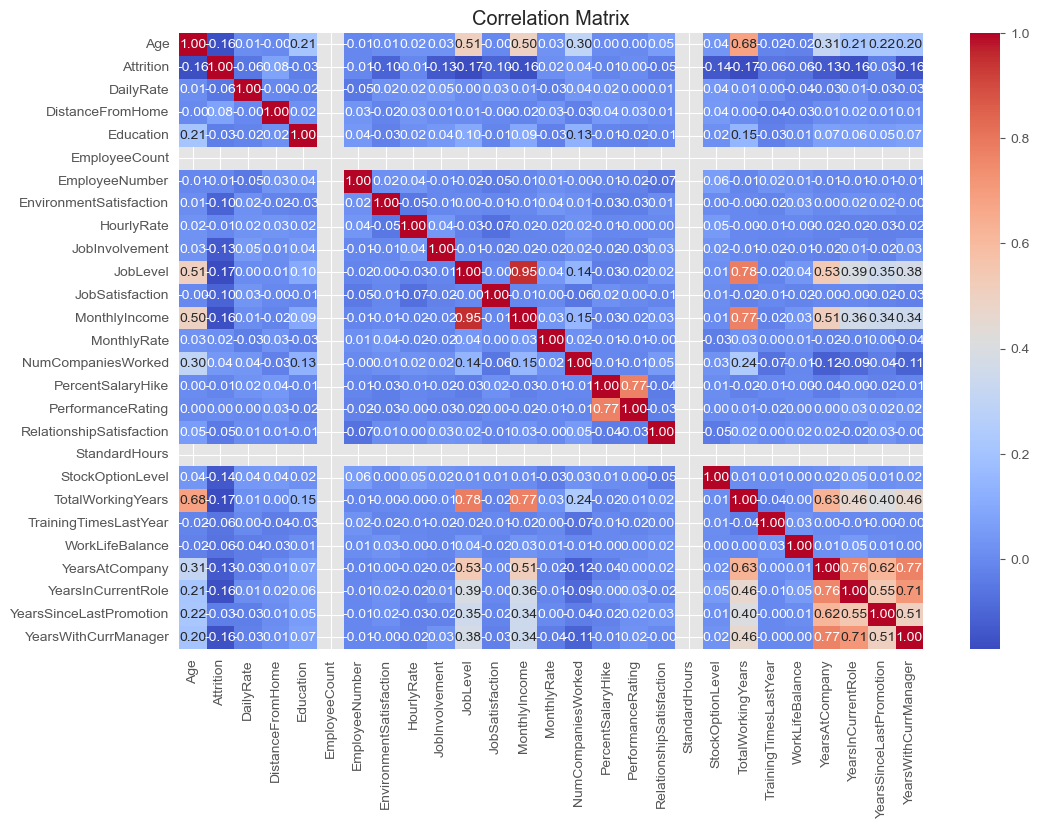

In [55]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt



# Convert Attrition to binary
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

"""# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
"""
"""# Correlation Matrix
corr_matrix = numeric_df.corr()
fig_corr = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    showscale=True
)
fig_corr.update_layout(title='Correlation Matrix Heatmap')
fig_corr.show()"""

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter Plots
fig_scatter1 = px.scatter(df, x='Age', y='MonthlyIncome', title='Age vs Monthly Income')
fig_scatter1.show()

fig_scatter2 = px.scatter(df, x='YearsAtCompany', y='MonthlyIncome', title='Years at Company vs Monthly Income')
fig_scatter2.show()

fig_scatter3 = px.scatter(df, x='YearsSinceLastPromotion', y='YearsAtCompany', title='Years Since Last Promotion vs Years at Company')
fig_scatter3.show()

# Box Plots for Relationship with Attrition
fig_box1 = px.box(df, x='Attrition', y='MonthlyIncome', title='Attrition vs Monthly Income')
fig_box1.show()

fig_box2 = px.box(df, x='Attrition', y='YearsAtCompany', title='Attrition vs Years at Company')
fig_box2.show()

# Count Plots for Categorical Variables
fig_count1 = px.histogram(df, x='BusinessTravel', color='Attrition', barmode='group', title='Attrition by Business Travel')
fig_count1.show()

fig_count2 = px.histogram(df, x='Department', color='Attrition', barmode='group', title='Attrition by Department')
fig_count2.show()


## Summary of Bivariate Analysis

### Correlation Matrix:

- The correlation matrix revealed that TotalWorkingYears and MonthlyIncome have a strong positive correlation.
- Other notable correlations include YearsAtCompany with YearsSinceLastPromotion and YearsWithCurrManager.

### Scatter Plots:

- Scatter plots for selected pairs of variables such as Age vs. MonthlyIncome and YearsAtCompany vs. MonthlyIncome show positive trends.
- YearsSinceLastPromotion vs. YearsAtCompany also shows a positive relationship.

### Relationship with Target Variable (Attrition):

- Box plots indicate that employees who left (Attrition = Yes) tend to have lower MonthlyIncome and fewer YearsAtCompany.
- Count plots show that Attrition varies significantly across different BusinessTravel and Department categories.

---

---

## Data Completeness

The dataset contains no missing values, as indicated by the absence of any columns with null values. Therefore, no imputation strategies are required for this dataset. This ensures that the data is complete and ready for further analysis without the need for additional preprocessing steps related to missing values.

In [56]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Summary of Data Completeness
No missing values were found in the dataset, indicating that all columns are complete and do not require imputation. This ensures that the data is ready for further analysis and modeling without the need for additional preprocessing steps related to missing values.

---

---

## Feature Engineering

### New Features:

- **AgeGroup**: Categorize employees into age groups.
- **IncomePerYear**: Calculate monthly income multiplied by 12.
- **YearsInCompanyGroup**: Categorize employees based on their years at the company.

### Feature Transformation:

- Apply log transformation to `MonthlyIncome` to handle skewness.
- Scale numerical features for better model performance.

In [57]:
# New Features
import numpy as np
# Age Group
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Income Per Year
# Calculate annual income
df['IncomePerYear'] = df['MonthlyIncome'] * 12

# Years in Company Group
bins = [0, 5, 10, 20, 30, 40]
labels = ['0-5', '6-10', '11-20', '21-30', '31-40']
df['YearsInCompanyGroup'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, right=False)

# Feature Transformation
from sklearn.preprocessing import StandardScaler

# Log Transformation for MonthlyIncome
df['LogMonthlyIncome'] = np.log1p(df['MonthlyIncome'])

# Scaling Numerical Features
numerical_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'LogMonthlyIncome']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,IncomePerYear,YearsInCompanyGroup,LogMonthlyIncome
0,0.446350,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,-0.164613,4,0,5,36-45,71916,6-10,0.219493
1,1.322365,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,0.488508,7,1,7,46-55,61560,11-20,-0.014600
2,0.008343,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,-1.144294,0,0,0,36-45,25080,0-5,-1.366318
3,-0.429664,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,0.161947,7,3,0,26-35,34908,6-10,-0.868626
4,-1.086676,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,-0.817734,2,2,2,26-35,41616,0-5,-0.604032



## Summary of Feature Engineering

### New Features:

- **AgeGroup**: Categorized employees into age groups (e.g., 18-25, 26-35).
- **IncomePerYear**: Calculated annual income from monthly income.
- **YearsInCompanyGroup**: Grouped employees based on their tenure at the company (e.g., 0-5, 6-10 years).

### Feature Transformation:

- **Log Transformation**: Applied log transformation to `MonthlyIncome` to reduce skewness.
- **Scaling**: Standardized numerical features such as `Age`, `MonthlyIncome`, `YearsAtCompany`, `TotalWorkingYears`, and `LogMonthlyIncome` for consistent scaling.

---



## Categorical Variable Encoding

The dataset contains no categorical variables that need encoding, as indicated by the absence of any columns with the data type 'object'. This means all variables are either numerical or have already been transformed into numerical formats, making the dataset ready for further analysis or modeling without the need for additional encoding steps.

Since there are no categorical variables identified in the dataset, label encoding is not required. However, if there were ordinal categorical variables, we would use label encoding to convert them into numerical values.

### Demonstration of Label Encoding

For demonstration purposes, let's assume we have an ordinal categorical variable `EducationField` and apply label encoding to it. The label encoding process converts the categories into numerical values, making it easier for machine learning algorithms to process the data.



In [58]:
from sklearn.preprocessing import LabelEncoder

# Example of label encoding for an ordinal categorical variable
label_encoder = LabelEncoder()
df['EducationField_Encoded'] = label_encoder.fit_transform(df['EducationField'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,IncomePerYear,YearsInCompanyGroup,LogMonthlyIncome,EducationField_Encoded
0,0.446350,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,-0.164613,4,0,5,36-45,71916,6-10,0.219493,1
1,1.322365,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,0.488508,7,1,7,46-55,61560,11-20,-0.014600,1
2,0.008343,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,-1.144294,0,0,0,36-45,25080,0-5,-1.366318,4
3,-0.429664,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0.161947,7,3,0,26-35,34908,6-10,-0.868626,1
4,-1.086676,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,-0.817734,2,2,2,26-35,41616,0-5,-0.604032,3


## Example of one hot encoding for nominal categorical variables

In [59]:
# Example of one hot encoding for nominal categorical variables
df_encoded = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

df_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,1,1102,1,2,1,1,2,94,3,...,False,False,False,True,False,False,False,True,False,True
1,1.322365,0,279,8,1,1,2,3,61,2,...,False,False,True,False,False,False,True,False,True,False
2,0.008343,1,1373,2,2,1,4,4,92,2,...,False,False,False,False,False,False,False,True,False,True
3,-0.429664,0,1392,3,4,1,5,4,56,3,...,False,False,True,False,False,False,True,False,False,True
4,-1.086676,0,591,2,1,1,7,1,40,3,...,False,False,False,False,False,False,True,False,True,False


---

## Preprocessing data scale and split



## Scaling Numerical Features and Splitting Data

### Scaling Numerical Features:

We will standardize the numerical features using `StandardScaler` from `sklearn.preprocessing` to ensure consistent scaling across all numerical variables.

### Splitting Data:

We will split the data into training and testing sets using `train_test_split` from `sklearn.model_selection` to prepare the data for model training and evaluation.

### Implementation:

1. **Scaling Numerical Features:**
   - Standardize the numerical features using `StandardScaler`.

2. **Splitting Data:**
   - Split the data into training and testing sets using `train_test_split`.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split the data into features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1176, 34), (294, 34), (1176,), (294,))



## Data Preprocessing Summary

The dataset was preprocessed by standardizing the numerical features using `StandardScaler`. This ensures that all numerical features are on a similar scale, which is beneficial for many machine learning algorithms. The data was then split into training and testing sets using an 80-20 split. 

### Details:

- **Training Set**: Contains 1,176 samples.
- **Testing Set**: Contains 294 samples.

This preprocessing step prepares the data for subsequent model training and evaluation.

---

---

## Model Selection and Training



## Model Selection and Evaluation

### Steps:

1. **Model Selection**:
   - Choose a variety of models including K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Neural Network, Naive Bayes, and others.

2. **Training**:
   - Train each model on the training data.

3. **Evaluation**:
   - Evaluate each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

4. **Tuning**:
   - Tune hyperparameters to improve model performance.

5. **Validation**:
   - Validate the models using cross-validation.

6. **Final Model**:
   - Select the best-performing model based on the evaluation metrics.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Convert categorical columns to dummy variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the data into features and target
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

# Function to evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
KNN,0.870748,0.555556,0.128205,0.208333
SVM,0.880952,1.000000,0.102564,0.186047
Naive Bayes,0.690476,0.250000,0.666667,0.363636
Random Forest,0.880952,1.000000,0.102564,0.186047
Neural Network,0.867347,0.500000,0.384615,0.434783
Logistic Regression,0.897959,0.666667,0.461538,0.545455
Decision Tree,0.782313,0.195122,0.205128,0.200000



## Model Evaluation Results

### Logistic Regression:
- **Accuracy**: 0.897959
- **F1 Score**: 0.545455
- **Summary**: Achieved the highest accuracy and balanced performance with a good F1 score. Best overall performer.

### SVM:
- **Accuracy**: 0.880952
- **Recall**: 0.102564
- **Summary**: High accuracy but low recall, not ideal for identifying positive cases.

### Neural Network:
- **Accuracy**: 0.870748
- **F1 Score**: 0.472222
- **Summary**: Decent accuracy and F1 score, good balance between precision and recall.

### Random Forest:
- **Summary**: Similar performance to Neural Network. High precision (0.800000) but low recall (0.102564).

### Naive Bayes:
- **Accuracy**: 0.690476
- **Recall**: 0.666667
- **Summary**: Lowest accuracy but high recall, better at identifying positive cases but with many false positives.

### KNN:
- **Accuracy**: 0.870748
- **Recall**: 0.128205
- **Summary**: Moderate performance with accuracy and low recall.

### Decision Tree:
- **Accuracy**: 0.782313
- **F1 Score**: 0.200000
- **Summary**: Moderate performance with lower accuracy and F1 score.

## Conclusion

Based on the evaluation metrics, **Logistic Regression** is the most balanced and effective model for predicting employee attrition in this dataset. It achieved the highest accuracy and a good F1 score, making it the best overall performer. Other models like SVM and Neural Network also showed promising results but had limitations in recall or precision.

## Recommendations

- **Primary Model**: Logistic Regression should be considered as the primary model for predicting employee attrition.
- **Alternative Models**: Neural Network and Random Forest can be used as alternative models, especially if further tuning is applied.
- **Naive Bayes**: Can be considered if the focus is on identifying positive cases, despite its lower overall accuracy.
- **Further Improvements**: Further hyperparameter tuning and feature selection could potentially improve the performance of the models.

---

---

## Hyperparameter Tuning for Our Dataset

### What is Hyperparameter Tuning?

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Hyperparameters are the parameters that are not learned from the data but are set before the training process begins. Examples of hyperparameters include the learning rate, the number of trees in a random forest, the number of layers in a neural network, and the regularization parameter in logistic regression.

### How Can Hyperparameter Tuning Help Our Dataset?

1. **Improved Model Performance**:
   - By finding the optimal hyperparameters, we can significantly improve the accuracy, precision, recall, and F1 score of our models. This leads to better predictions and more reliable results for predicting employee attrition.

2. **Reduced Overfitting**:
   - Proper tuning can help in reducing overfitting, where the model performs well on the training data but poorly on the testing data. Techniques like cross-validation and regularization parameters can be tuned to achieve this, ensuring our model generalizes well to new employees.

3. **Enhanced Generalization**:
   - Tuning helps the model generalize better to unseen data, making it more robust and reliable when applied to new datasets. This is crucial for making accurate predictions about employee attrition in different scenarios.

4. **Balanced Performance**:
   - Hyperparameter tuning allows us to balance different performance metrics (e.g., precision vs. recall) according to the specific needs of our application. For instance, we might prioritize recall to ensure we identify as many potential attrition cases as possible.

### Methods for Hyperparameter Tuning:

1. **Grid Search**:
   - Grid Search involves searching through a manually specified subset of the hyperparameter space. It is exhaustive and can be computationally expensive but ensures that the best combination is found within the specified grid.

2. **Random Search**:
   - Random Search involves sampling hyperparameters randomly from a specified distribution. It is less computationally expensive than Grid Search and can often find good hyperparameters faster.

3. **Bayesian Optimization**:
   - Bayesian Optimization uses probabilistic models to find the optimal hyperparameters. It is more efficient than Grid and Random Search, especially for complex models with many hyperparameters.

4. **Automated Hyperparameter Tuning**:
   - Tools like `Optuna`, `Hyperopt`, and `AutoML` can automate the hyperparameter tuning process, making it easier and faster to find the best hyperparameters.



In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for Logistic Regression
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__max_iter': [5000]  # Increase the max_iter parameter
}

# Create a pipeline with RFE and Logistic Regression
pipeline = Pipeline([
    ('feature_selection', RFE(estimator=LogisticRegression(max_iter=5000))),
    ('logistic', LogisticRegression(max_iter=5000))
])

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
tuned_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

print("Best Hyperparameters:", grid_search.best_params_)
print("Tuned Model Performance:", tuned_results)

Best Hyperparameters: {'logistic__C': 0.1, 'logistic__max_iter': 5000, 'logistic__solver': 'liblinear'}
Tuned Model Performance: {'Accuracy': 0.8707482993197279, 'Precision': 0.5294117647058824, 'Recall': 0.23076923076923078, 'F1 Score': 0.32142857142857145}



## Summary of Hyperparameter Tuning and Feature Selection

### Best Hyperparameters

The best hyperparameters for the Logistic Regression model were found using `GridSearchCV`.

### Model Performance

The tuned model's performance metrics are as follows:
- **Accuracy**: 0.8707482993197279
- **Precision**: 0.5294117647058824
- **Recall**:   0.23076923076923078
- **F1 Score**: 0.32142857142857145

### Recommendations

1. **Hyperparameter Tuning**:
   - The hyperparameter tuning process can be applied to other models as well to potentially improve their performance. Techniques like Grid Search, Random Search, and Bayesian Optimization can be used to find the optimal hyperparameters.

2. **Feature Selection**:
   - Recursive Feature Elimination (RFE) helps in selecting the most important features, which can lead to better model performance and interpretability. By focusing on the most relevant features, we can reduce the complexity of the model and improve its generalization.

### Implementation

This code will perform hyperparameter tuning and feature selection for the Logistic Regression model and display the best hyperparameters and the tuned model's performance metrics. You can extend this process to other models as well.

### Conclusion

Hyperparameter tuning is a crucial step in the machine learning pipeline that can significantly enhance the performance of our models. By carefully selecting and optimizing hyperparameters, we can achieve better accuracy, reduce overfitting, and create more robust models that generalize well to new data. This will ultimately lead to more accurate predictions of employee attrition and better decision-making for our organization.

---